In [60]:
#All the libraries required are called
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [61]:
#the dataframe is created
dframe = pd.read_csv('HireArt - Data Analyst Exercise 10.12.17.csv')
dframe.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


In [9]:
#description of the dataframe information
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null object
dtypes: object(3)
memory usage: 23.5+ KB


In [62]:
#checking if the dataframe has any null values
dframe.isnull().values.any()

False

In [63]:
#splitting the date of contract into different columns
dframe['Year'], dframe['Month'], dframe['Day'] = zip(*dframe['Date of Contact'].map(lambda x: x.split('-')))
dframe.head()

,Account manager,Client Name,Date of Contact,Year,Month,Day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,07
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25


In [64]:
#description of the data frame 
dframe.describe()

,Account manager,Client Name,Date of Contact,Year,Month,Day
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,5,12,31
top,Milan Crona,Eichmann and Sons,2013-10-11,2014,10,19
freq,286,38,7,264,213,44


In [65]:
#finding which month has the total number of clients
dframe_month= dframe.groupby(['Month'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
dframe_month

,Month,Number of Clients
9,10,213
8,09,121
7,08,79
5,06,77
11,12,77
4,05,69
6,07,66
10,11,65
1,02,64
0,01,60


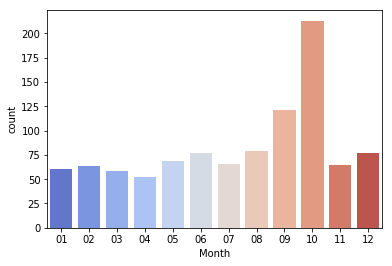

In [66]:
#visulaizing that which month has highest count
cplot = sns.countplot(x="Month", data=dframe,palette='coolwarm')


In [69]:
#function definition for finding and plotting which year and month has the higest percentage
def yearmonth():
    
    years = list(df.Year.unique())
    for y in years:
        dframe_year = dframe[dframe['Year'] == y]
        grouped = dframe_year.groupby(['Month'])
        clients = grouped['Client Name'].nunique()
        differentclients = dframe_year['Client Name'].nunique()
        perc = (clients/differentclients) * 100
        my_dictionary = {}
        j =0
        for i in grouped:
            my_dictionary[i[0]]=perc[j]
            j = j+1
        maximum = max(my_dictionary, key=my_dictionary.get)  
        print("In the Year",y,"The maximum number in the month of:",maximum,"by",round(my_dictionary[maximum],4),"the percentage ")
        plt.bar(range(len(my_dictionary)), list(my_dictionary.values()), align='center')
        plt.xticks(range(len(my_dictionary)), list(my_dictionary.keys()))
        

In the Year 2015 The maximum number in the month of: 10 by 80.0 the percentage 
In the Year 2013 The maximum number in the month of: 10 by 88.5714 the percentage 
In the Year 2016 The maximum number in the month of: 10 by 71.4286 the percentage 
In the Year 2014 The maximum number in the month of: 10 by 80.0 the percentage 
In the Year 2017 The maximum number in the month of: 09 by 60.0 the percentage 


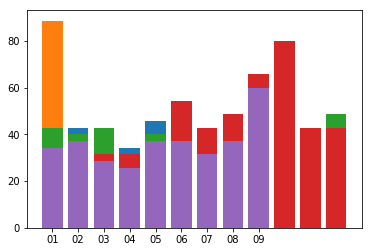

In [70]:
yearmonth()